# CloudSat

CloudSat products can be downloaded by using the ``download`` method of the corresponding product object. For this example we will have a look a the radar reflectivity contained in the 2B-GEOPROF product.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from datetime import datetime
t_0 = datetime(2016, 11, 21, 10)
t_1 = datetime(2016, 11, 21, 12)

The variable ``files`` now contains the downloaded files. Now we only need to decipher the data format and extract the data of interest.

## L1B CPR

In [2]:
from pansat.products.satellite.cloud_sat import l1b_cpr
files_l1b = l1b_cpr.download(t_0, t_1)
dataset = l1b_cpr.open(files_l1b[0])
display(dataset)

<xarray.Dataset>
Dimensions:               (bins: 125, rays: 37081)
Coordinates:
  * rays                  (rays) int64 0 1 2 3 4 ... 37077 37078 37079 37080
  * bins                  (bins) int64 0 1 2 3 4 5 6 ... 119 120 121 122 123 124
    latitude              (rays) float64 -0.008771 -0.01844 ... 0.0005542
    longitude             (rays) float64 -141.5 -141.5 -141.5 ... -166.2 -166.2
    time_since_start      (rays) float64 0.0 0.16 0.32 ... 5.933e+03 5.933e+03
Data variables:
    received_echo_powers  (rays, bins) float32 -9999.0 -9999.0 ... -9999.0

Text(0.0, 1.0, '(a) L1B-CPR')

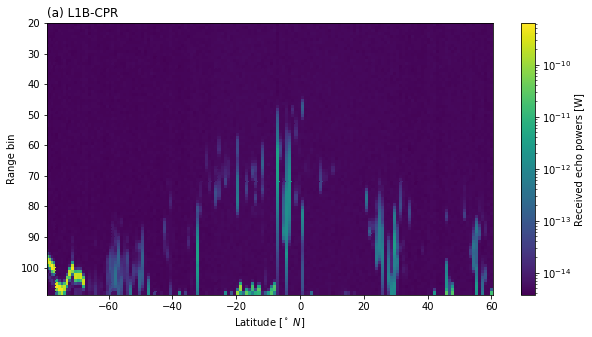

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

start = 10000
end = 25000
stride = 100
pwrs = dataset["received_echo_powers"][start:end:stride, 20:110]
lats = dataset["latitude"][start:end:stride]
bins = dataset["bins"][20:110]

plt.figure(figsize=(10, 5))
plt.pcolormesh(lats, bins, pwrs.T, norm=LogNorm())
plt.colorbar(label="Received echo powers [W]")
plt.gca().invert_yaxis()
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Range bin");
plt.title("(a) L1B-CPR", loc="left")

In [5]:
pwrs.attrs

{'unit': 'W',
 'description': 'Echo Power is the calibrated range gate power in watts, made in-flight and averaged.'}

## L2B GEOPROF

In [8]:
from pansat.products.satellite.cloud_sat import l2b_geoprof
files_l2b = l2b_geoprof.download(t_0, t_1)
dataset = l2b_geoprof.open(files_l2b[0])
display(dataset)

<xarray.Dataset>
Dimensions:             (bins: 125, rays: 37081)
Coordinates:
  * rays                (rays) int64 0 1 2 3 4 ... 37076 37077 37078 37079 37080
  * bins                (bins) int64 0 1 2 3 4 5 6 ... 119 120 121 122 123 124
    latitude            (rays) float64 -0.008771 -0.01844 ... 0.01022 0.0005542
    longitude           (rays) float64 -141.5 -141.5 -141.5 ... -166.2 -166.2
    time_since_start    (rays) float64 0.0 0.16 0.32 ... 5.933e+03 5.933e+03
    height              (rays, bins) int16 -9999 -9999 -9999 ... -9999 -9999
Data variables:
    radar_reflectivity  (rays, bins) int16 -8888 -8888 -8888 ... -8888 -8888

Text(0.0, 1.0, '(b) L2B-GEOPROF')

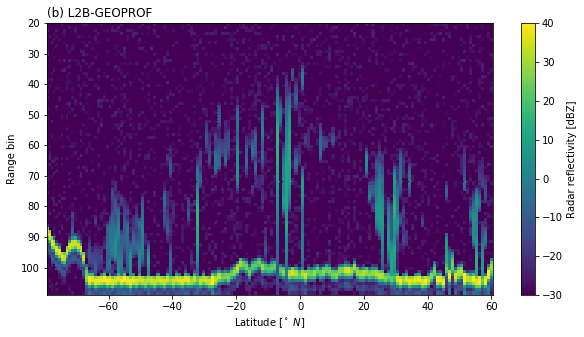

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

start = 10000
end = 25000
stride = 100
z = dataset["radar_reflectivity"][start:end:stride, 20:110] / 100.0
lats = dataset["latitude"][start:end:stride]
bins = dataset["bins"][20:110]

plt.figure(figsize=(10, 5))
plt.pcolormesh(lats, bins, z.T, norm=Normalize(-30, 40))
plt.colorbar(label="Radar reflectivity [dBZ]")
plt.gca().invert_yaxis()
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Range bin");
plt.title("(b) L2B-GEOPROF", loc="left")

## L2B CLDCLASS

In [11]:
from pansat.products.satellite.cloud_sat import l2b_cldclass
files = l2b_cldclass.download(t_0, t_1)
dataset = l2b_cldclass.open(files[0])
display(dataset)

<xarray.Dataset>
Dimensions:           (bins: 125, rays: 37081)
Coordinates:
  * rays              (rays) int64 0 1 2 3 4 5 ... 37076 37077 37078 37079 37080
  * bins              (bins) int64 0 1 2 3 4 5 6 ... 118 119 120 121 122 123 124
    latitude          (rays) float64 -0.008771 -0.01844 ... 0.01022 0.0005542
    longitude         (rays) float64 -141.5 -141.5 -141.5 ... -166.2 -166.2
    time_since_start  (rays) float64 0.0 0.16 0.32 ... 5.933e+03 5.933e+03
Data variables:
    cloud_scenario    (rays, bins) int16 2113 2113 2113 2113 ... 2113 2113 2113

Text(0.0, 1.0, '(b) L2B-GEOPROF')

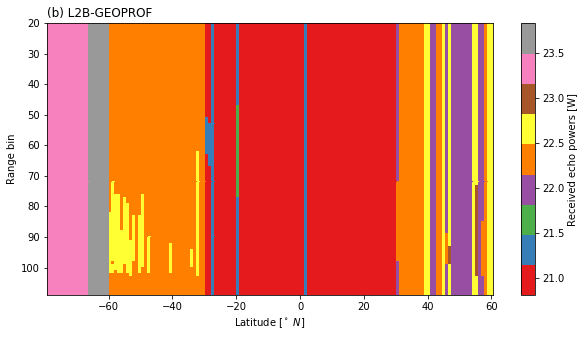

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

start = 10000
end = 25000
stride = 100
pwrs = dataset["cloud_scenario"][start:end:stride, 20:110] / 100.0
lats = dataset["latitude"][start:end:stride]
bins = dataset["bins"][20:110]

plt.figure(figsize=(10, 5))
plt.pcolormesh(lats, bins, pwrs.T, cmap="Set1")
plt.colorbar(label="Received echo powers [W]")
plt.gca().invert_yaxis()
plt.xlabel(r"Latitude [$^\circ\ N$]")
plt.ylabel("Range bin");
plt.title("(b) L2B-GEOPROF", loc="left")